In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
startup=pd.read_csv("/content/sample_data/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# **EDA and Visualization**

In [ ]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startup.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


BoxPlot for R&D Spend


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


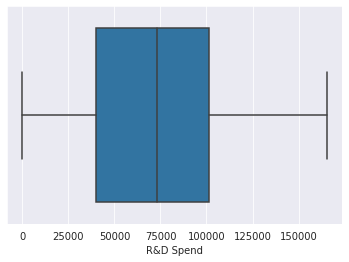

BoxPlot for Administration


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


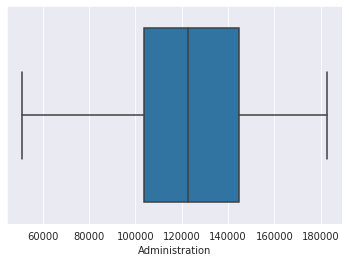

BoxPlot for Marketing Spend


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


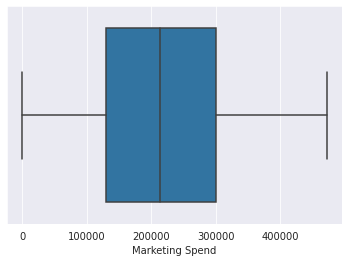

BoxPlot for Profit


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


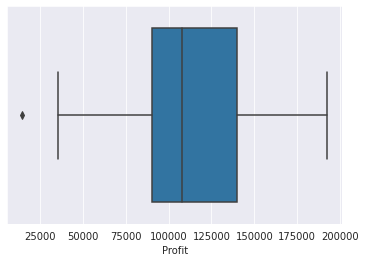

In [ ]:
#boxplot for outliers
for i in startup.columns:
  if i!='State':
    print("BoxPlot for {}".format(i))
    sns.boxplot(i,data=startup)
    plt.show()

In [ ]:
data_new=startup.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'Mkts'},axis=1)
data_new.head()

,RDS,Admin,Mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#check for duplicate data
data_new[data_new.duplicated()]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   Admin   50 non-null     float64
 2   Mkts    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# **corelation analysis**

In [ ]:
data_new.corr()

,RDS,Admin,Mkts,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


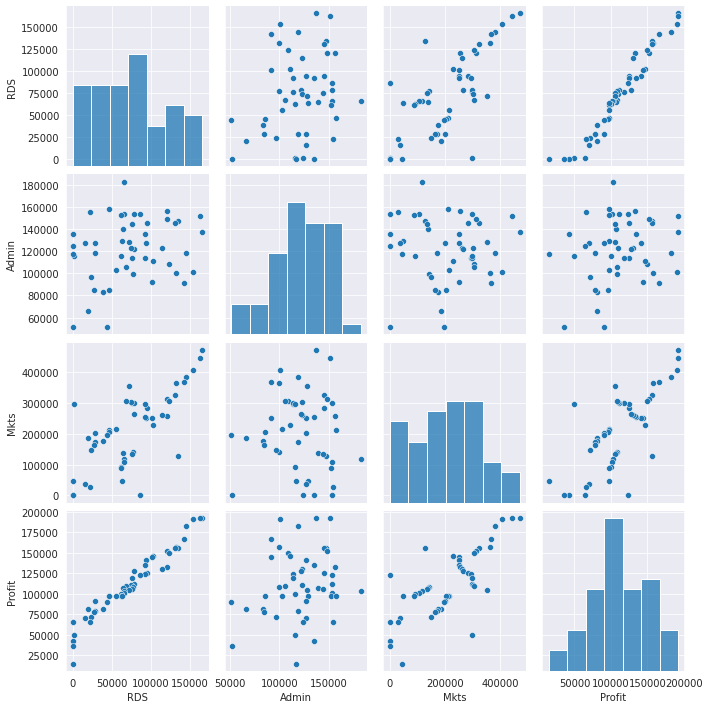

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data_new)

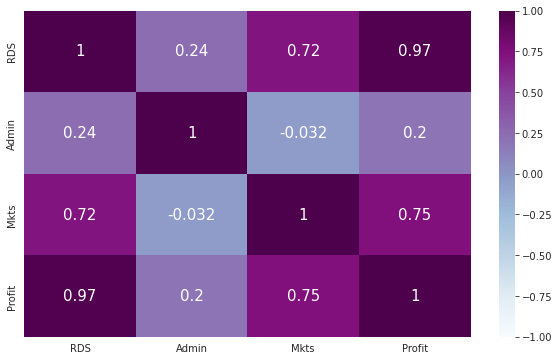

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data_new.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 15});

In [ ]:
formula='Profit~RDS+Admin+Mkts'
model=smf.ols(formula,data=data_new).fit()
#model.summary()
print(model.params)


Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
Mkts             0.027228
dtype: float64


In [ ]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept     7.626218
 RDS          17.846374
 Admin        -0.525507
 Mkts          1.655077
 dtype: float64, Intercept    1.057379e-09
 RDS          2.634968e-22
 Admin        6.017551e-01
 Mkts         1.047168e-01
 dtype: float64)

In [ ]:
# Finding rsquared values
model.rsquared , model.rsquared_adj ## 94% is the model prediction rate 

(0.9507459940683246, 0.9475337762901719)

In [ ]:
# lets buils SLR and MLR models for insignificant variables 'Admin' and 'Mkts'
model_Admin=smf.ols('Profit~Admin',data=data_new).fit()
model_Admin.tvalues , model_Admin.pvalues #pvalue is very in significant

(Intercept    3.040044
 Admin        1.419493
 dtype: float64, Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [ ]:
model_mkts=smf.ols('Profit~Mkts',data=data_new).fit()
model_mkts.tvalues , model_mkts.pvalues #pvalue is very in significant

(Intercept    7.808356
 Mkts         7.802657
 dtype: float64, Intercept    4.294735e-10
 Mkts         4.381073e-10
 dtype: float64)

In [ ]:
model_mkts_adm=smf.ols('Profit~Mkts+Admin',data=data_new).fit()
model_mkts_adm.tvalues , model_mkts_adm.pvalues

(Intercept    1.142741
 Mkts         8.281039
 Admin        2.467779
 dtype: float64, Intercept    2.589341e-01
 Mkts         9.727245e-11
 Admin        1.729198e-02
 dtype: float64)

In [ ]:
#colienrity check using ViF = 1/(1-R2)
########   RDS
RD_r2=smf.ols('RDS~Admin+Mkts',data=data_new).fit().rsquared
RD_vif=1/(1-RD_r2)
########  Admin
Admin_r2=smf.ols('Admin~RDS+Mkts',data=data_new).fit().rsquared
Admin_vif=1/(1-Admin_r2)
######## MKTS
mkts_r2=smf.ols('Mkts~Admin+RDS',data=data_new).fit().rsquared
mkts_vif=1/(1-mkts_r2)


Vif=pd.DataFrame({'variables':['RDS','Admin','MKTS'],'vif':[RD_vif,Admin_vif,mkts_vif]})

Vif


,variables,vif
0,RDS,2.468903
1,Admin,1.175091
2,MKTS,2.326773


In [ ]:
#from above observation we found that VIF is below 5 so the assuming there is no colinearity we consider all independant variable for 
#building the model
#  1<VIF<5   features are moderately correlated

In [ ]:
#let go for residual plots
#Test for Normality of Residuals (Q-Q Plot)

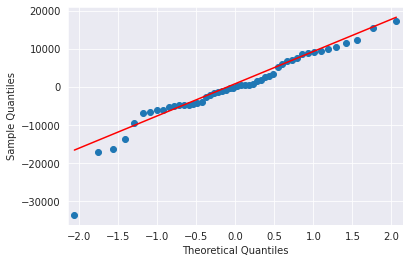

In [ ]:
sm.qqplot(model.resid,line='q')
plt.show()  # from below graph it is visible that there is one out lier above -3000 

In [ ]:
list(np.where(model.resid<-30000))

[array([49])]

In [ ]:
#test for homoscedacity
def standard_values(vals):
  return (vals-vals.median())/vals.std()

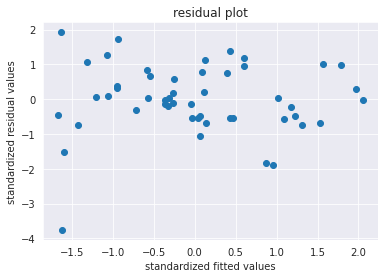

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig) 

eval_env: 1


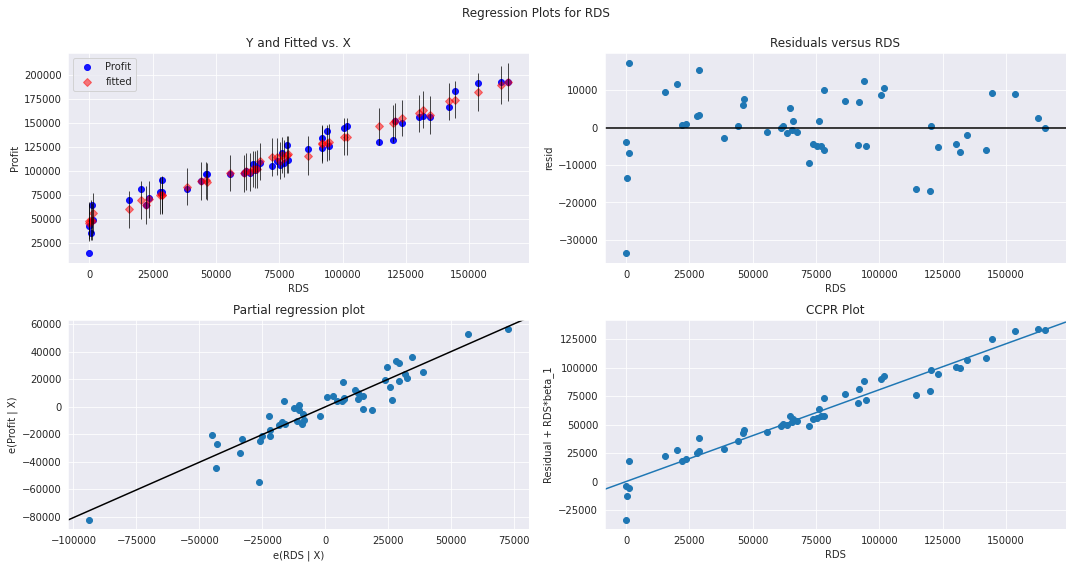

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


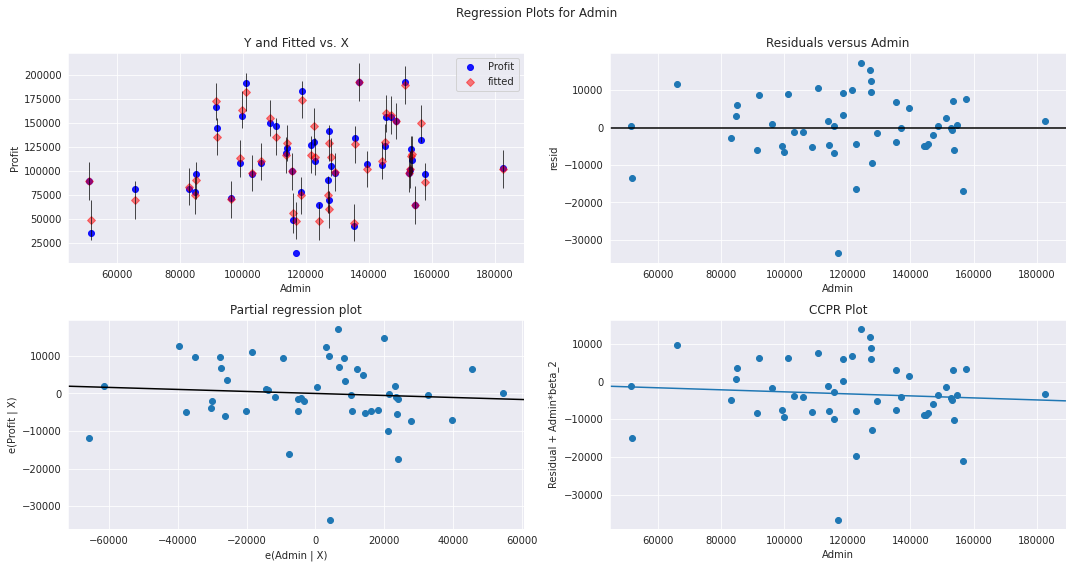

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Admin',fig=fig)
plt.show()

eval_env: 1


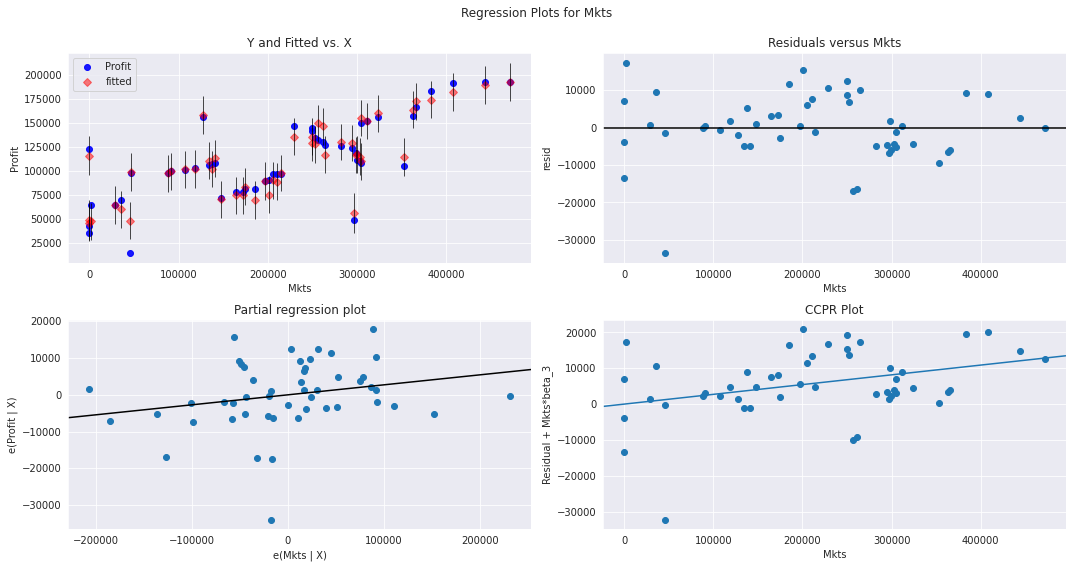

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Mkts',fig=fig)
plt.show()

# **Model deletion Diagnostics** (cooks distance, leverage test)

In [ ]:
#if cooks distance is > 1 it is an outliers
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

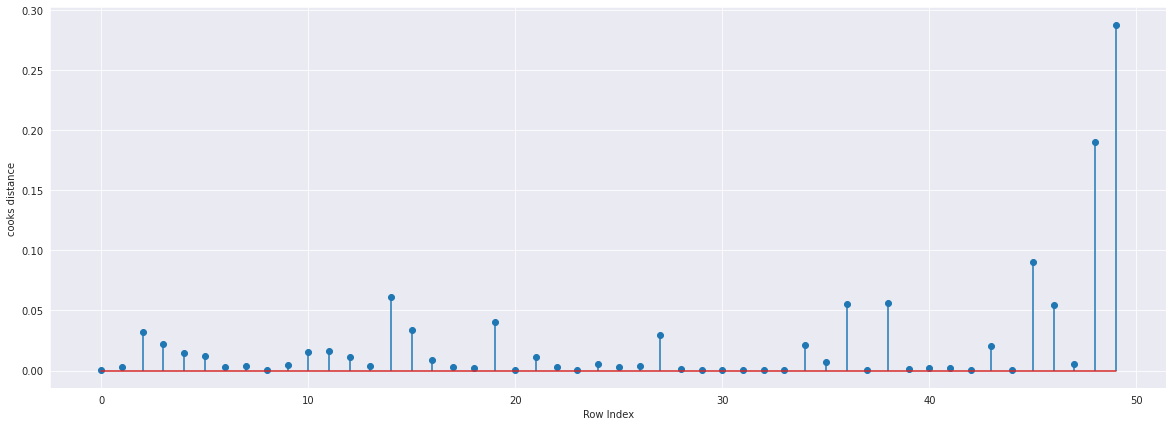

In [ ]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.xlabel("Row Index")
plt.ylabel("cooks distance")
plt.show()


In [ ]:
# Index and value of influencer
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

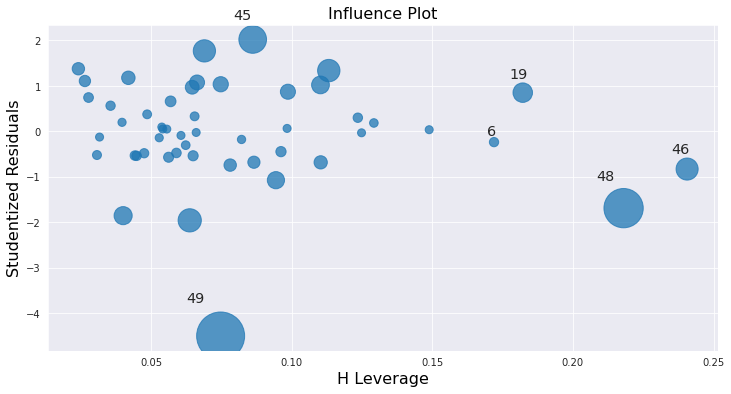

In [ ]:
#2 leverage point check = 3(k+1)/n   : k = no of column , n = number of rows
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(12,6))
influence_plot(model,ax=ax,criterion='cooks')
plt.show()

In [ ]:
k=data_new.shape[1]
n=data_new.shape[0]
lev_value=3*(k+1)/n
lev_value

0.36

In [ ]:
data_new[data_new.index.isin([49])]

,RDS,Admin,Mkts,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# **improving the model**

In [ ]:
#discarding the data which influencing the model
startup_new=data_new.drop(startup.index[49],axis=0).reset_index(drop=True)
startup_new.shape

(49, 5)

In [ ]:
startup_new

,RDS,Admin,Mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#new model
model2=smf.ols('Profit~RDS+Admin+Mkts',data=startup_new).fit()
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
Mkts             0.025234
dtype: float64

In [ ]:
model2.rsquared , model2.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [ ]:
while model2.rsquared < 0.99:
  for c in [np.max(c)>1]:
        model2=smf.ols('Profit~RDS+Admin+Mkts',data=startup_new).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        startup_new=startup_new.drop(startup_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        startup_new
  else:
    final_model=smf.ols('Profit~RDS+Admin+Mkts',data=startup_new).fit()
    final_model.rsquared , model2.rsquared_adj
    print("Thus model accuracy is improved to",final_model.rsquared)



Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779906
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [ ]:
final_model.rsquared,final_model.rsquared_adj
#approx = 0.99

(0.9882757054424702, 0.9867464496306185)

# **model prediction**

In [ ]:
# data after fit
startup_new.head()

,RDS,Admin,Mkts,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#New data for prediction is
data_new=pd.DataFrame({'RDS':50000,"Admin":70000,"Mkts":120000},index=[0])
data_new

,RDS,Admin,Mkts
0,50000,70000,120000


In [ ]:
data_pred=final_model.predict(data_new)
data_pred

0    89528.707654
dtype: float64

In [ ]:
y_pred=final_model.predict(startup_new)
startup_new['y_pred']=y_pred

In [ ]:
startup_new.head()

,RDS,Admin,Mkts,State,Profit,y_pred
0,142107.34,91391.77,366168.42,Florida,166187.94,165589.539700
1,131876.90,99814.71,362861.36,New York,156991.12,158552.826483
2,130298.13,145530.06,323876.68,Florida,155752.60,156789.000710
3,120542.52,148718.95,311613.29,New York,152211.77,149524.698853
4,123334.88,108679.17,304981.62,California,149759.96,150122.356712


In [ ]:
## R2 table
data_r2={'prep_model':['model_initial','model_final'],'R2-Value':[0.9587,0.9867]}
data_r2=pd.DataFrame(data_r2)
data_r2

,prep_model,R2-Value
0,model_initial,0.9587
1,model_final,0.9867
